### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


Name: MD AZIZUL HOQUE
ID : 46769579

In [5]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
#Reading csv File
ecom = pd.read_csv('The_E_commerce_Dataset.csv')
ecom

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [7]:
#Describing data frame
ecom.describe()

,userId,timestamp,rating,helpfulness,item_id,item_price,user_city
count,20000.000000,20000.000000,19983.000000,19978.000000,20000.000000,20000.000000,20000.000000
mean,5500.909450,59025.503550,3.701847,2.596306,41.789950,82.180847,19.393200
std,3343.265765,37967.900334,1.404619,1.750681,27.271524,42.242699,11.626928
min,0.000000,10100.000000,1.000000,0.000000,0.000000,12.000000,0.000000
25%,1995.750000,21500.000000,3.000000,0.000000,17.000000,48.250000,9.000000
50%,5898.000000,52701.000000,4.000000,4.000000,41.000000,72.000000,19.000000
75%,8408.250000,91600.000000,5.000000,4.000000,65.000000,126.500000,29.000000
max,10808.000000,123199.000000,5.000000,4.000000,88.000000,149.000000,39.000000


In [8]:
#Displaying first few rows
ecom.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [9]:
#Displaying list of columns
ecom.columns

Index(['userId', 'timestamp', 'review', 'item', 'rating', 'helpfulness',
       'gender', 'category', 'item_id', 'item_price', 'user_city'],
      dtype='object')

In [10]:
#shape of data set
ecom.shape

(20000, 11)

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [29]:
#Displaying the DataFrame using info 
ecom.info

<bound method DataFrame.info of        userId  timestamp                                    review  \
0        4051      12807                 Great job for what it is!   
1        4052     122899               Free Access Worth your Time   
2          33      12700             AOL..I love you!!!!!!!!!!!!     
3          33      21000              EBAY!!!  I LOVE YOU!!!! :-)*   
4          33      22300           Blair Witch...Oh Come On.......   
...       ...        ...                                       ...   
19995   10805      50600                 The Upper Class Fast Food   
19996   10806      82201             What more can you ask for????   
19997   10806      82201          Excellent steak for a good price   
19998   10807      31504                     Different story world   
19999   10808      10200  Boldly Displaying Sigourneys Cleavage ..   

                                                    item  rating  helpfulness  \
0                                             

In [11]:
#printing the length of the data before removing the missing data.
print(len(ecom))

20000


In [12]:
#Find list of columns containing missing values
ecom.isna().sum()

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [13]:
#Removing the missing data
clean_dS = ecom.dropna()
clean_ds = clean_dS[clean_dS['review'] != 'none']
clean_ds

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [14]:
#Printing length of the dataset after removing missing values
print(len(clean_ds))

19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [15]:
#creating data frame unique_user list
unique_users = clean_ds['userId'].unique()
unique_reviews = clean_ds['review'].unique()
unique_items = clean_ds['item'].unique()
unique_category = clean_ds['category'].unique()

#printing length of unique users, reviews, items and category list
print("Total number of unique users : ",len(unique_users))
print("Total number of unique reviews : ",len(unique_reviews))
print("Total number of unique items : ",len(unique_items))
print("Total number of unique categories : ",len(unique_category))

Total number of unique users :  8562
Total number of unique reviews :  19459
Total number of unique items :  89
Total number of unique categories :  9


In [16]:
#Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
des_rating = clean_ds['rating'].describe()
des_rating

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [17]:
#Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
# group function how many male and how many females and count function and last describe function

In [18]:
num_of_male = clean_ds.groupby(clean_ds['gender'] == 'M').item.count().describe()
num_of_female = clean_ds.groupby(clean_ds['gender'] == 'F').item.count().describe()
#for male 
num_of_male

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: item, dtype: float64

In [19]:
#for female
num_of_female

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: item, dtype: float64

In [20]:
#Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
clean_ds.groupby(clean_ds['item']).rating.value_counts().describe()

count    442.000000
mean      45.058824
std       48.011537
min        1.000000
25%       15.000000
50%       32.000000
75%       56.000000
max      334.000000
Name: rating, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

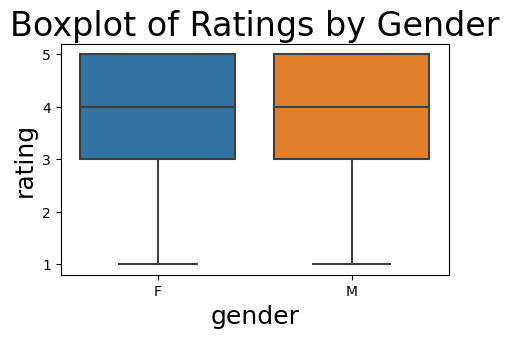

In [21]:
#grouped1 = clean_ds.groupby('gender')['rating'].apply(list)

# Create a boxplot using Matplotlib
plt.figure(figsize = (5, 3))
plt.xlabel('gender' , size = 18)
plt.ylabel('Rating' , size = 18)
plt.title('Boxplot of Ratings by Gender', size = 24)
sns.boxplot(x = 'gender', y = 'rating', data = clean_ds)
plt.show()

- This rating by gender boxplot shows similar center line lower whisker that means both share same distribution.

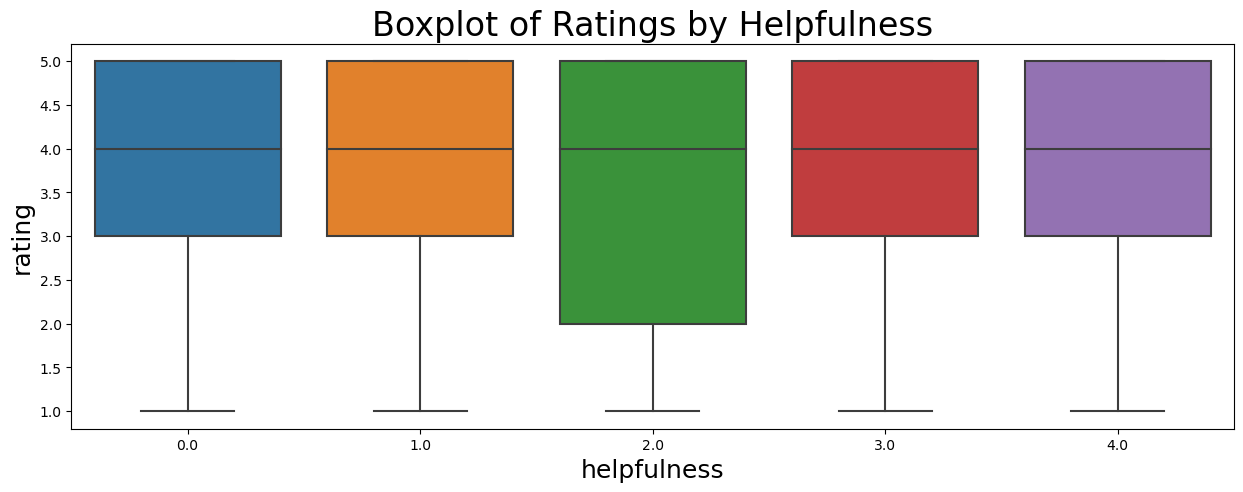

In [22]:
# Create a boxplot using Matplotlib
plt.figure(figsize = (15, 5))
plt.ylabel('Rating' , size = 18)
plt.xlabel('helpfulness' , size = 18)
plt.title('Boxplot of Ratings by Helpfulness', size = 24)
sns.boxplot(x = 'helpfulness', y = 'rating', data = clean_ds)
plt.show()

- This rating by helpfulness box plot shows blue, orange, red and violet color which are 0, 1, 3, 4 rating share similar distribution except the green one.

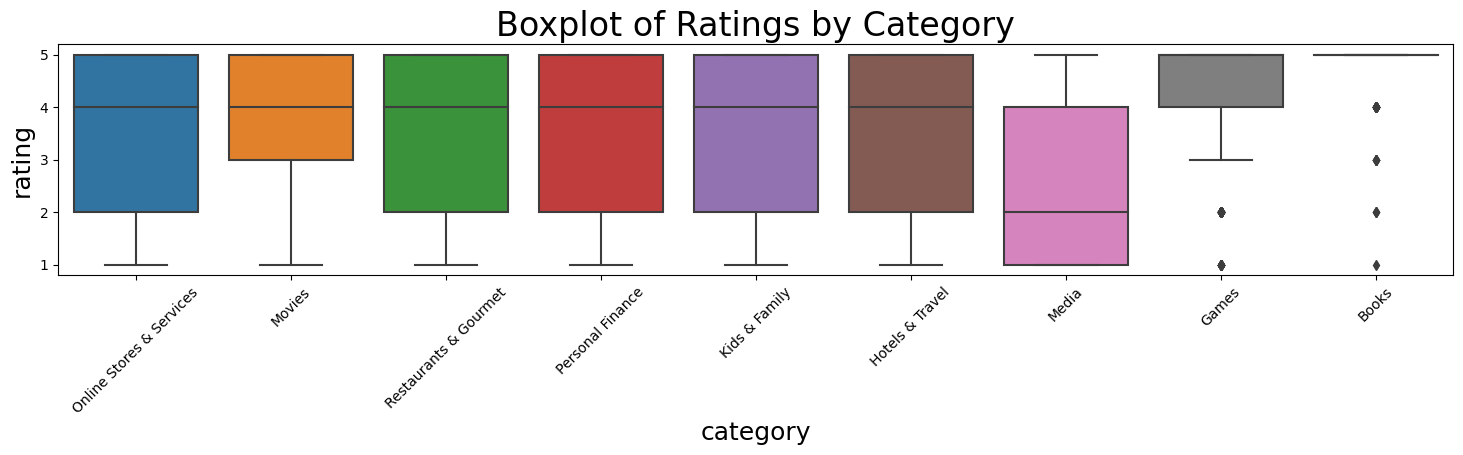

In [30]:
# Create a boxplot using Matplotlib
plt.figure(figsize = (18, 3))
plt.ylabel('Rating' , size = 18)
plt.xlabel('Category' , size = 18)
plt.title('Boxplot of Ratings by Category', size = 24)
plt.xticks(rotation = 45)
sns.boxplot(x = 'category', y = 'rating', data = clean_ds)
plt.show()

- This rating by category box plot shows  online stores and services, Restaurants and Gourmet, Personal Finance, Kids & Family, Hotels & Travels data share similar distribution but Movies 25 % data is diffrent from the mentioned data. Box plot of Media data shows upper whisker distribution which is completely different from other data. Games data shows two outlier and books shows 4 outliers by the dots.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [25]:
#printing length of data frame before removing outliers
print(len(clean_ds))

19916


In [26]:
# Removing outlier reviews
clean_data = clean_ds[clean_ds['helpfulness'] > 2]

# Counting user and item ratings
user_counts = clean_data['userId'].value_counts()
item_counts = clean_data['item'].value_counts()

# Removing outlier users
outlier_users = user_counts[user_counts < 7].index.tolist()
new_df = clean_data[~clean_data['userId'].isin(outlier_users)]

# Removing outlier items
outlier_items = item_counts[item_counts < 11].index.tolist()
desired_ds = new_df[~new_df['item'].isin(outlier_items)]

print("Cleaned DataFrame:")
print(desired_ds)

Cleaned DataFrame:
       userId  timestamp                                           review  \
78       4081      71900                                Not always McCrap   
80       4081      72000  I dropped the chalupa even before he told me to   
81       4081      72000                     The Wonderful World of Wendy   
82       4081     100399                             They actually did it   
83       4081     100399                             Hey! Gimme some pie!   
...       ...        ...                                              ...   
19983    2445      22000                                     Great movie!   
19985    2445      30700                                       Good food!   
19988    2445      61500                                     Great movie!   
19989    2445     100500                                    Awesome Game.   
19990    2445     101400                                   Great Service.   

                                            item  rating

In [27]:
#printing the length of data after removing outliers
print(len(desired_ds))

2741
